<a href="https://colab.research.google.com/github/DLPY/Regression-Session-2/blob/master/SydneyHousePrices_MultipleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<centre> **House Price Prediction based on Postal Code, Number of Bedrooms and Bathrooms, Car Parking  and Property Type**</centre>

Detail on Data : https://www.kaggle.com/mihirhalai/sydney-house-prices

## 1. Download source data from Github

In [1]:
!wget https://raw.githubusercontent.com/DLPY/Regression-Session-2/master/Data/SydneyHousePrices.csv

--2021-11-09 16:03:04--  https://raw.githubusercontent.com/DLPY/Regression-Session-2/master/Data/SydneyHousePrices.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11406664 (11M) [text/plain]
Saving to: ‘SydneyHousePrices.csv.3’

SydneyHousePrices.c 100%[===================>]  10.88M  --.-KB/s    in 0.1s    

2021-11-09 16:03:04 (103 MB/s) - ‘SydneyHousePrices.csv.3’ saved [11406664/11406664]



## 2. Import neccssary packages for performing EDA and Multiple regression

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

pd.set_option('display.max_colwidth', None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 3. Read data into pandas dataframe to perform data analysis, cleaning and transformation

In [3]:
df = pd.read_csv('SydneyHousePrices.csv')

In [4]:
df.head(5)

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house


In [5]:
df.shape

(199504, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199504 entries, 0 to 199503
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        199504 non-null  object 
 1   Id          199504 non-null  int64  
 2   suburb      199504 non-null  object 
 3   postalCode  199504 non-null  int64  
 4   sellPrice   199504 non-null  int64  
 5   bed         199350 non-null  float64
 6   bath        199504 non-null  int64  
 7   car         181353 non-null  float64
 8   propType    199504 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 13.7+ MB


In [7]:
round(df.describe(), 2)

,Id,postalCode,sellPrice,bed,bath,car
count,199504.00,199504.00,1.995040e+05,199350.00,199504.00,181353.00
mean,99752.50,2196.38,1.269776e+06,3.52,1.89,1.94
std,57591.99,193.05,6.948239e+06,1.07,0.93,1.06
min,1.00,2000.00,1.000000e+00,1.00,1.00,1.00
25%,49876.75,2082.00,7.200000e+05,3.00,1.00,1.00
50%,99752.50,2144.00,9.850000e+05,3.00,2.00,2.00
75%,149628.25,2211.00,1.475000e+06,4.00,2.00,2.00
max,199504.00,4878.00,2.147484e+09,99.00,99.00,41.00


**From the above max - It shows the dataset has outliers and it needs to be removed.**

## 4. Choosing predictors and target variables for performing Multiple Regression

**Target and Source variables**

*   SellingPrice - Target Variable
*   Bed, Bath, Car, propType, postalCode  - Predictor Variables



In [8]:
df_new = df[(df['Date']>= '2017-01-01') & (df['Date']< '2020-01-01')].reset_index(drop=True)
df_new = df_new[['postalCode', 'bath', 'car', 'propType' , 'sellPrice']]

In [9]:
df_new.propType.unique()

array(['house', 'townhouse', 'duplex/semi-detached', 'villa', 'other',
       'terrace', 'warehouse', 'acreage'], dtype=object)

In [10]:
df['propType'].value_counts()

house                   170117
townhouse                15177
duplex/semi-detached      6722
villa                     5701
terrace                   1344
other                      392
warehouse                   40
acreage                     11
Name: propType, dtype: int64

In [11]:
df_new.head(5)

,postalCode,bath,car,propType,sellPrice
0,2107,2,2.0,house,1210000
1,2107,3,4.0,house,2250000
2,2107,3,2.0,house,2920000
3,2107,1,2.0,house,1530000
4,2107,4,4.0,house,8000000


Encoding the categorical variables - Change the text into numbers

In [12]:
df_new['propType'] = df_new['propType'].astype('category').cat.codes

In [13]:
df_new.propType.unique()

array([2, 5, 1, 6, 3, 4, 7, 0], dtype=int8)

In [14]:
df_new.head(5)

,postalCode,bath,car,propType,sellPrice
0,2107,2,2.0,2,1210000
1,2107,3,4.0,2,2250000
2,2107,3,2.0,2,2920000
3,2107,1,2.0,2,1530000
4,2107,4,4.0,2,8000000


In [15]:
df_new.dtypes

postalCode      int64
bath            int64
car           float64
propType         int8
sellPrice       int64
dtype: object

In [16]:
df_new.count()

postalCode    60995
bath          60995
car           57090
propType      60995
sellPrice     60995
dtype: int64

In [17]:
df_new.isnull().sum()

postalCode       0
bath             0
car           3905
propType         0
sellPrice        0
dtype: int64

In [18]:
df_new['car'].fillna(df_new.groupby(['postalCode'])['car'].transform('median'), inplace=True)
#df_new['bed'].fillna(df_new.groupby(['postalCode', 'propType'])['bed'].transform('median'), inplace=True)

In [19]:
df_new.isnull().sum()

postalCode    0
bath          0
car           0
propType      0
sellPrice     0
dtype: int64

## 5. Remove outliers in the data

In [20]:
def remove_outlier(df_in, col_name):
# Removes outliers from a specified column of a dataframe using IQR and returns an updated dataframe.
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1 # Interquartile range
    fence_low  = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [21]:
#df_no_outlier_bed = remove_outlier(df_new, 'bed').reset_index(drop=True)
df_no_outlier_bath = remove_outlier(df_new, 'bath').reset_index(drop=True)
df_no_outlier_car = remove_outlier(df_no_outlier_bath, 'car').reset_index(drop=True)
df_no_outlier = remove_outlier(df_no_outlier_car, 'sellPrice').reset_index(drop=True)

In [22]:
df_no_outlier.describe()

,postalCode,bath,car,propType,sellPrice
count,52458.000000,52458.000000,52458.000000,52458.000000,5.245800e+04
mean,2259.887110,1.767814,1.712256,2.370067,1.155078e+06
std,231.380742,0.680559,0.606963,1.123813,5.224147e+05
min,2000.000000,1.000000,1.000000,0.000000,1.000000e+03
25%,2115.000000,1.000000,1.000000,2.000000,7.450000e+05
50%,2166.000000,2.000000,2.000000,2.000000,1.005000e+06
75%,2232.000000,2.000000,2.000000,2.000000,1.460000e+06
max,4212.000000,3.000000,3.000000,7.000000,2.766000e+06


In [23]:
corr = df_no_outlier.corr()

In [24]:
corr

,postalCode,bath,car,propType,sellPrice
postalCode,1.000000,-0.051593,0.017311,-0.030173,-0.539464
bath,-0.051593,1.000000,0.288033,-0.086355,0.273533
car,0.017311,0.288033,1.000000,-0.087028,0.143199
propType,-0.030173,-0.086355,-0.087028,1.000000,-0.185970
sellPrice,-0.539464,0.273533,0.143199,-0.185970,1.000000


## 6. Correlation heatmap with the mask and correct aspect ratio

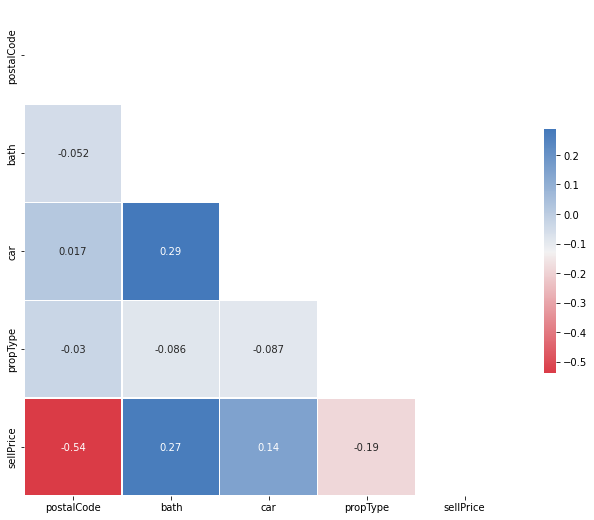

In [25]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 250, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=0.2, cbar_kws={'shrink': 0.5}, ax=ax, annot=True)

## 7. Split Target and Predictor Variables to different dataframes

In [26]:
X = df_no_outlier.iloc[:, :-1]
y = df_no_outlier.iloc[:, 4]

In [27]:
X.head(5)

,postalCode,bath,car,propType
0,2107,2,2.0,2
1,2107,1,2.0,2
2,2107,2,2.0,2
3,2107,1,2.0,2
4,2107,1,2.0,2


In [28]:
y.head(5)

0    1210000
1    1530000
2    1610000
3    1510000
4    1400000
Name: sellPrice, dtype: int64

Convert dataframes to values to feed into Model

In [29]:
X = X.values
y = y.values

In [30]:
print('Number of records and predictor variables:', X.shape)
print('Number of records and target variable:', y.shape)

Number of records and predictor variables: (52458, 4)
Number of records and target variable: (52458,)


## 8. Split dataset into the training and test using train_set_split: 90% - train and 10% - test

In [31]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=23)

In [32]:
print('Training Data:', X_train.shape, y_train.shape)
print('Testing Data:', X_test.shape, y_test.shape)

Training Data: (47212, 4) (47212,)
Testing Data: (5246, 4) (5246,)


## 9. Train, Test and Predict using regression model

Create an object called regressor in the LinearRegression class

In [33]:
regressor = LinearRegression()

Fit the linear regression model to the training set. We use the fit method the arguments of the fit method will be training sets

In [34]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Regression Coefficients

In [35]:
print('Coefficients: ', regressor.coef_)

Coefficients:  [ -1204.26160164 159007.81926934  65613.1335534  -82366.65052855]


In [36]:
columns=['postalCode', 'bath', 'car', 'propType' ]
Coefficient = pd.DataFrame(regressor.coef_).T
Coefficient.columns = columns
Coefficient

,postalCode,bath,car,propType
0,-1204.261602,159007.819269,65613.133553,-82366.650529


Predicting the Test set results

In [37]:
y_pred= regressor.predict(X_test)

## 10. Evaluation metrics - How to Calculate R-Square and RMSE

In [38]:
coefficient_of_dermination = r2_score(y_test,y_pred)
print('R-squared:',coefficient_of_dermination)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: {}'.format(rmse))

R-squared: 0.4087963299441838
Root Mean Squared Error: 407483.5079411727


In [39]:
# Displaying Results and Difference in Table 
res = pd.DataFrame(y_pred, y_test)
res = res.reset_index()
res.columns = ['Price', 'Prediction']
res['Prediction'] = round(res['Prediction'], 0)
res['Difference'] = res['Price'] - res['Prediction']
res.head(5)

,Price,Prediction,Difference
0,2702000,1547549.0,1154451.0
1,929000,1301251.0,-372251.0
2,1042000,918131.0,123869.0
3,692000,1153665.0,-461665.0
4,1900000,1560796.0,339204.0


## 11. Regression on Full data using OLS model

In [40]:
Regression = sm.OLS(endog = y, exog = X).fit()

In [41]:
print(Regression.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.824
Model:                            OLS   Adj. R-squared (uncentered):              0.824
Method:                 Least Squares   F-statistic:                          6.153e+04
Date:                Tue, 09 Nov 2021   Prob (F-statistic):                        0.00
Time:                        16:03:07   Log-Likelihood:                     -7.6600e+05
No. Observations:               52458   AIC:                                  1.532e+06
Df Residuals:                   52454   BIC:                                  1.532e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = df_no_outlier[list(df_no_outlier.columns[:-1])]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(VIF.values, i) for i in range(VIF.shape[1])]
vif_info['Column'] = VIF.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,15.379863,postalCode
2,9.482412,car
1,8.015820,bath
3,5.146063,propType


###To read more on skewness, kurtosis, autocorrelation and multicollinearity.

---
https://www.sciencedirect.com/topics/neuroscience/kurtosis 

---
https://www.investopedia.com/terms/d/durbin-watson-statistic.asp 

---
https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity